In [62]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
from datetime import datetime
import seaborn as sns
from collections import Counter
%matplotlib inline

In [63]:

heart_data=pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [64]:
heart_data.columns = ['Age', 'Gender', 'Chest_Pain', 'Resting_BP', 'Cholesterol', 'Fasting_BS', 'RECG', 'Max_Heart_Rate',
       'Exercise_Ang', 'ST_Depression', 'ST_Segmen', 'Major_Vessels', 'Thalassemia', 'Patient']

In [65]:
featuress = ["Age","Gender","Max_Heart_Rate","Resting_BP"]

In [66]:
heart_data.head()

,Age,Gender,Chest_Pain,Resting_BP,Cholesterol,Fasting_BS,RECG,Max_Heart_Rate,Exercise_Ang,ST_Depression,ST_Segmen,Major_Vessels,Thalassemia,Patient
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [90]:
bg_color = (1, 1, 1)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':20,
            'figure.figsize':(8.0,5.0),
            'xtick.labelsize':10,
            'ytick.labelsize':10})

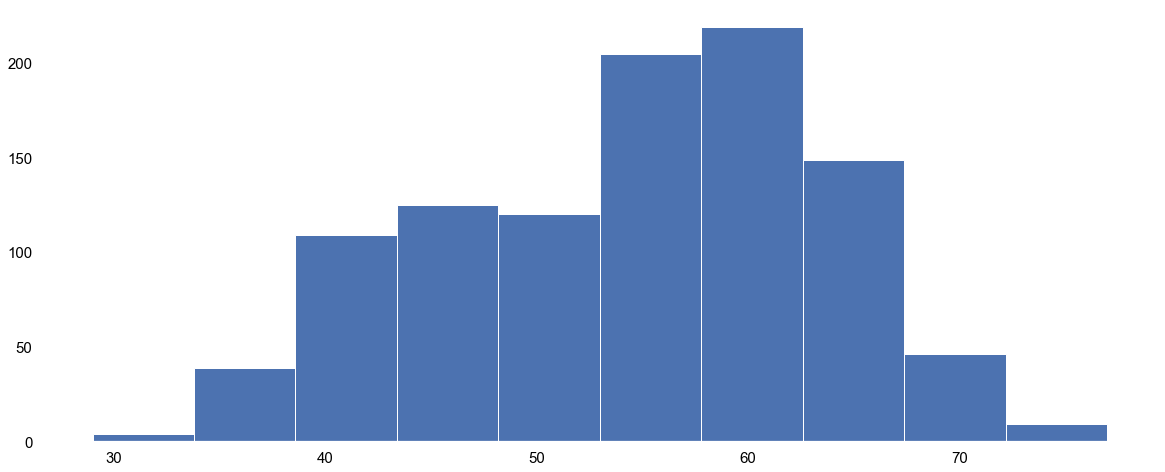

In [73]:
plt.figure(figsize=(20,8))
heart_data['Age'].hist(grid=False)

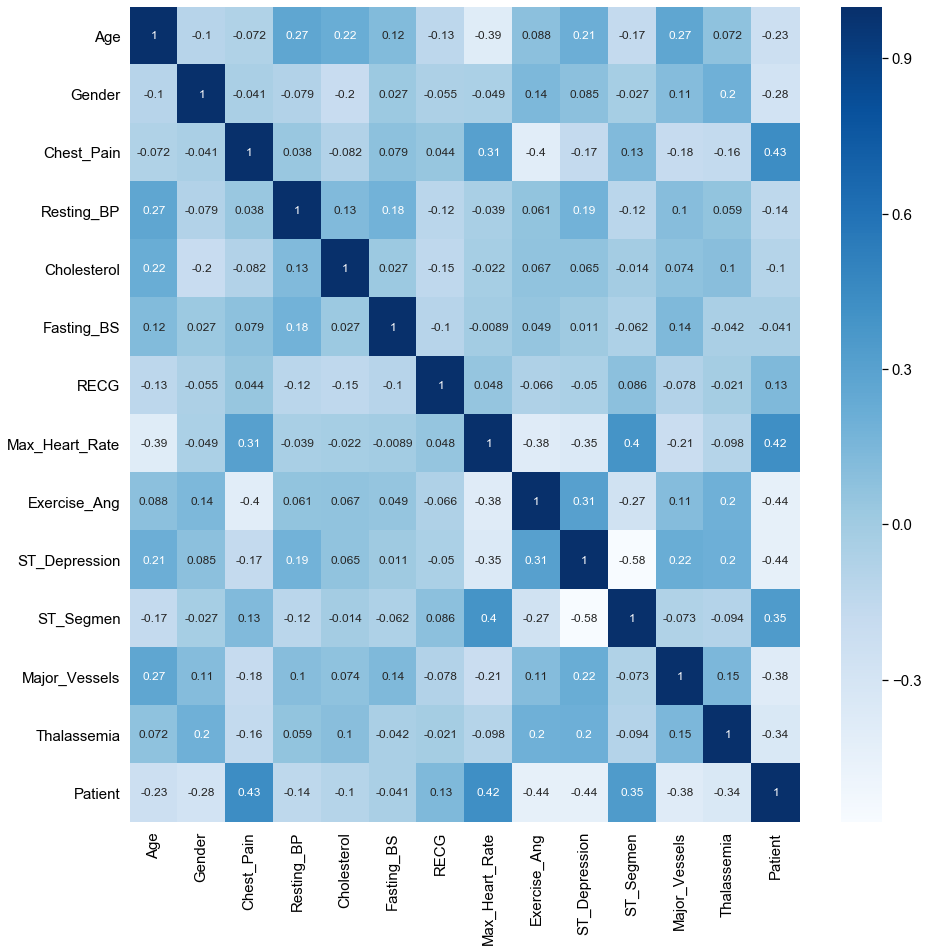

In [74]:
fig=plt.figure(figsize=(15,15))
sns.heatmap(heart_data.corr(), annot= True, cmap='Blues')

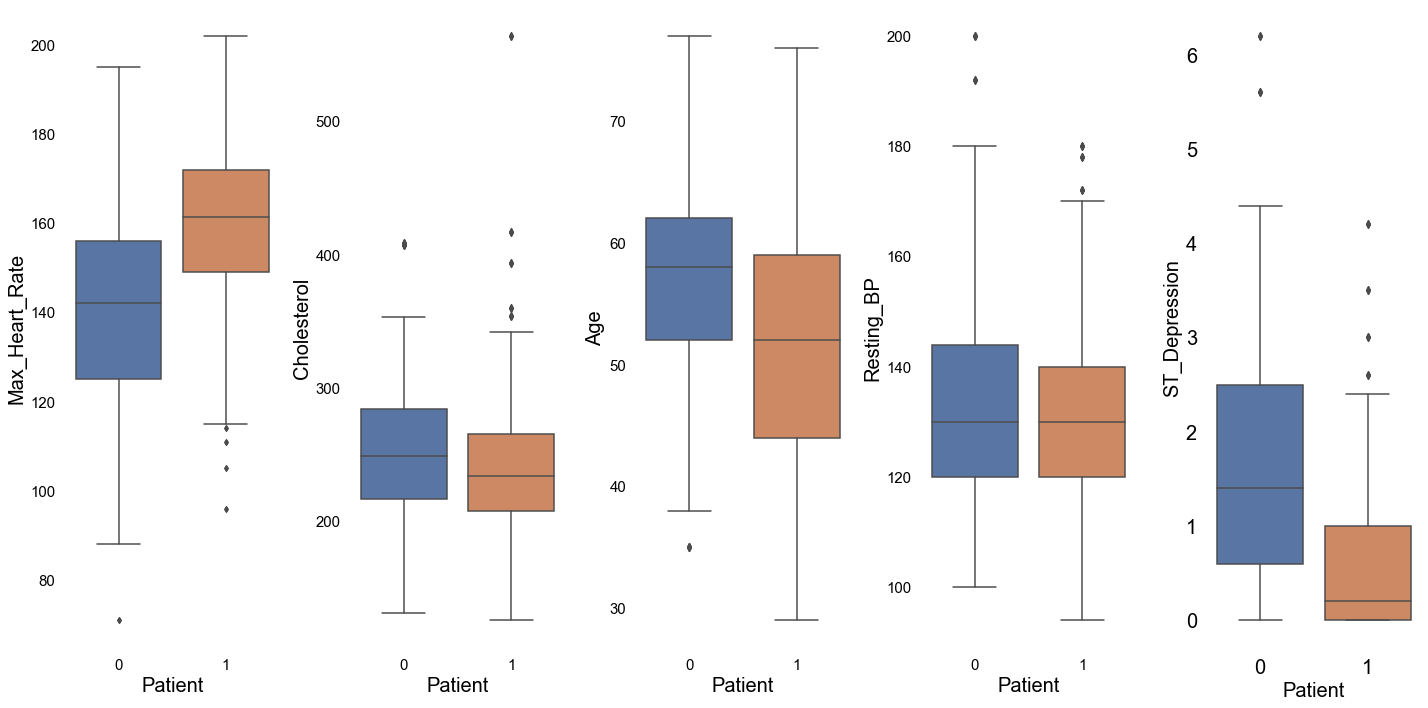

In [75]:
#0 is females 1 is males
f, axes = plt.subplots(1, 5,figsize=(20,10))
sns.set(font_scale=1)
sns.boxplot(x=heart_data.Patient, y=heart_data.Max_Heart_Rate, ax=axes[0],fliersize=4);
sns.boxplot(x=heart_data.Patient, y=heart_data.Cholesterol, ax=axes[1]);
sns.boxplot(x=heart_data.Patient, y=heart_data.Age, ax=axes[2]);
sns.boxplot(x=heart_data.Patient, y=heart_data.Resting_BP, ax=axes[3]);
sns.boxplot(x=heart_data.Patient, y=heart_data.ST_Depression, ax=axes[4]);
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()


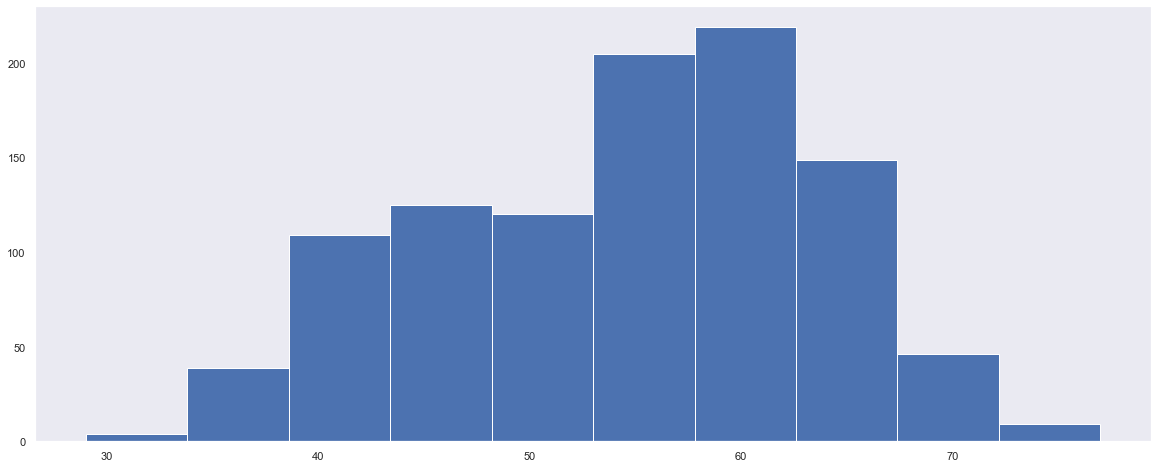

In [76]:
plt.figure(figsize=(20,8))
heart_data['Age'].hist(grid=False)

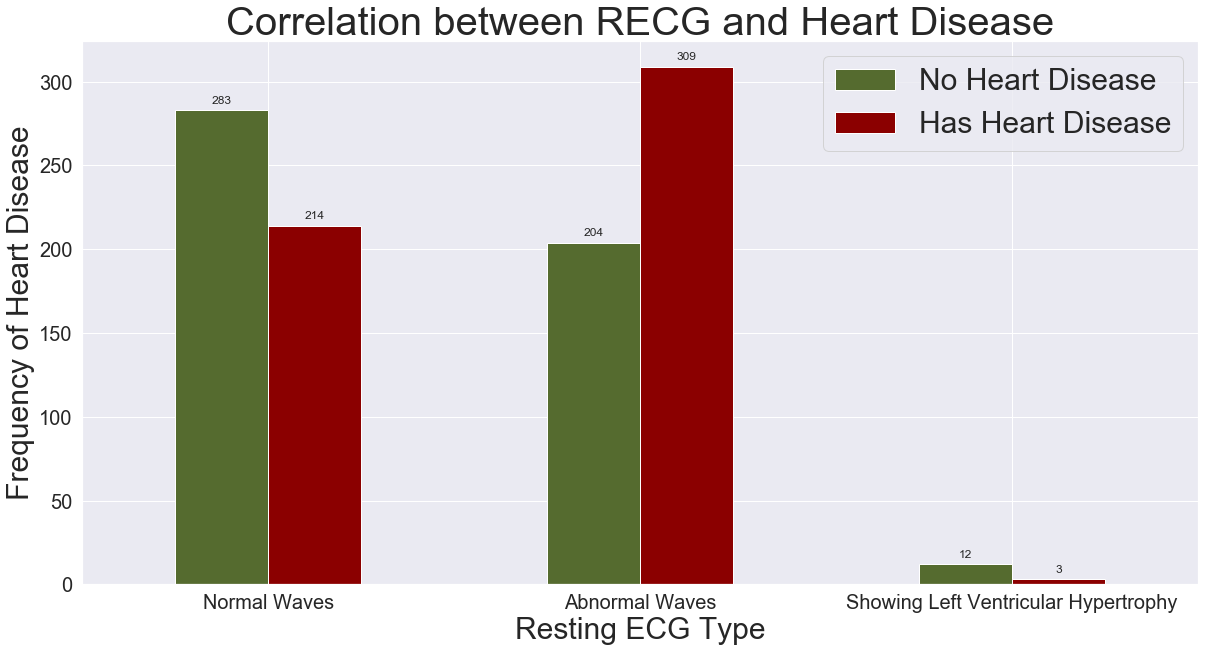

In [77]:
grap = pd.crosstab(heart_data.RECG,heart_data.Patient).plot(kind="bar",figsize=(20,10),color=['darkolivegreen','darkred' ])
plt.legend(['No Heart Disease', 'Has Heart Disease'],prop={'size': 30})

plt.xlabel('Resting ECG Type',fontsize=30)
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Heart Disease',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
locs, labels=plt.xticks()
new_xticks = ['Normal Waves','Abnormal Waves', 'Showing Left Ventricular Hypertrophy']
plt.xticks(locs, new_xticks)


plt.title("Correlation between RECG and Heart Disease",fontsize =40)

for p in grap.patches: 
    grap.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points') 


plt.show()

Text(0.5, 1.0, 'Age Distribution')

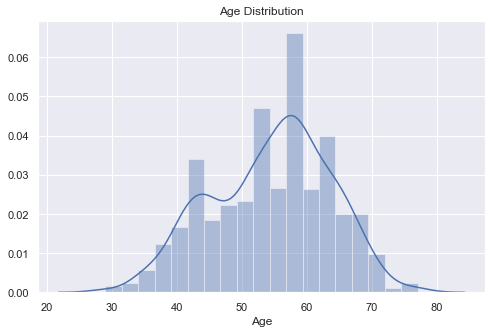

In [78]:
heart_data.Age.unique()
sb.distplot(heart_data.Age)
plt.title('Age Distribution')

In [79]:
heart_data.Gender.value_counts()

1    713
0    312
Name: Gender, dtype: int64

Total People[0,1]:  1025
Total Male[1]:  713
Total Female[0]:  312
Percentage of Male: 69.5609756097561 %
Percentage of Female: 30.4390243902439 %


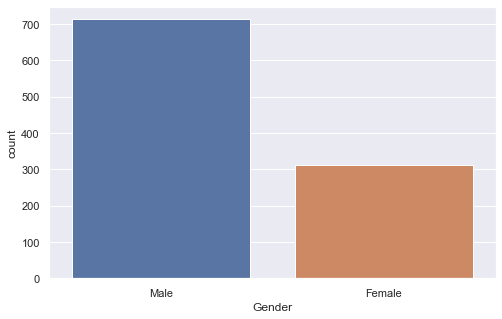

In [81]:
sb.countplot(heart_data.Gender)
print('Total People[0,1]: ',len(heart_data.Gender))
total_male=[i for i in  heart_data.Gender if i=='Male']
print('Total Male[1]: ',len(total_male))
total_female=len(heart_data.Gender)-len(total_male)
print('Total Female[0]: ',total_female)
heart_data.Gender.replace(to_replace=[0,1],value=['Female','Male'],inplace=True)

male_percentage=((len(total_male))*100)/(len(heart_data.Gender))
female_percentage=100-male_percentage
print('Percentage of Male: '+str(male_percentage)+' %')
print('Percentage of Female: '+str(female_percentage)+' %')

In [82]:
result=[]
for i in heart_data['Chest_Pain']:
    if i == 0:
        result.append('Typical Angina')
    if i ==1:
        result.append('Atypical Angina')
    if i ==2:
        result.append('Non-Anginal')
    if i==3:
        result.append('Asymptomatic')
        
heart_data['ChestPainType']=pd.Series(result)

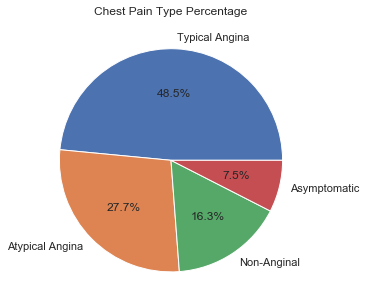

In [83]:
plt.figure(figsize=(5,8))
Chest_Pain=(heart_data['ChestPainType']).value_counts()
percent_typAng= Chest_Pain[0] *100/ len(heart_data)
percent_AtypAng=Chest_Pain[1]*100/len(heart_data)
percent_nonAng=Chest_Pain[2]*100/len(heart_data)
percent_none=Chest_Pain[3]*100/len(heart_data)

values= [percent_typAng, percent_AtypAng, percent_nonAng, percent_none]
labels=['Typical Angina','Atypical Angina','Non-Anginal','Asymptomatic']
plt.pie(values, labels=labels,autopct='%1.1f%%')
plt.title("Chest Pain Type Percentage")    
plt.show()

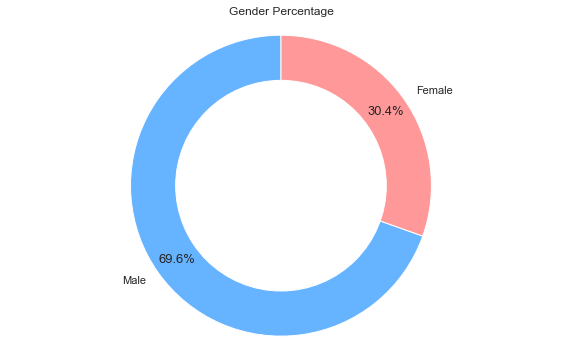

In [84]:
import matplotlib as mpl

count = (heart_data['Gender']).value_counts()
percent_Male = 713
percent_Female = 312
colors = ['#66b3ff','#ff9999']

values =[percent_Male, percent_Female]
labels =['Male', 'Female']
mpl.rcParams['font.size'] = 13

plt.pie(values, labels=labels, colors=colors,startangle=90, pctdistance=0.85, autopct='%1.1f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()
plt.title("Gender Percentage")
plt.show()

([<matplotlib.axis.XTick at 0x246e69aeac8>,
 <a list of 2 Text xticklabel objects>)

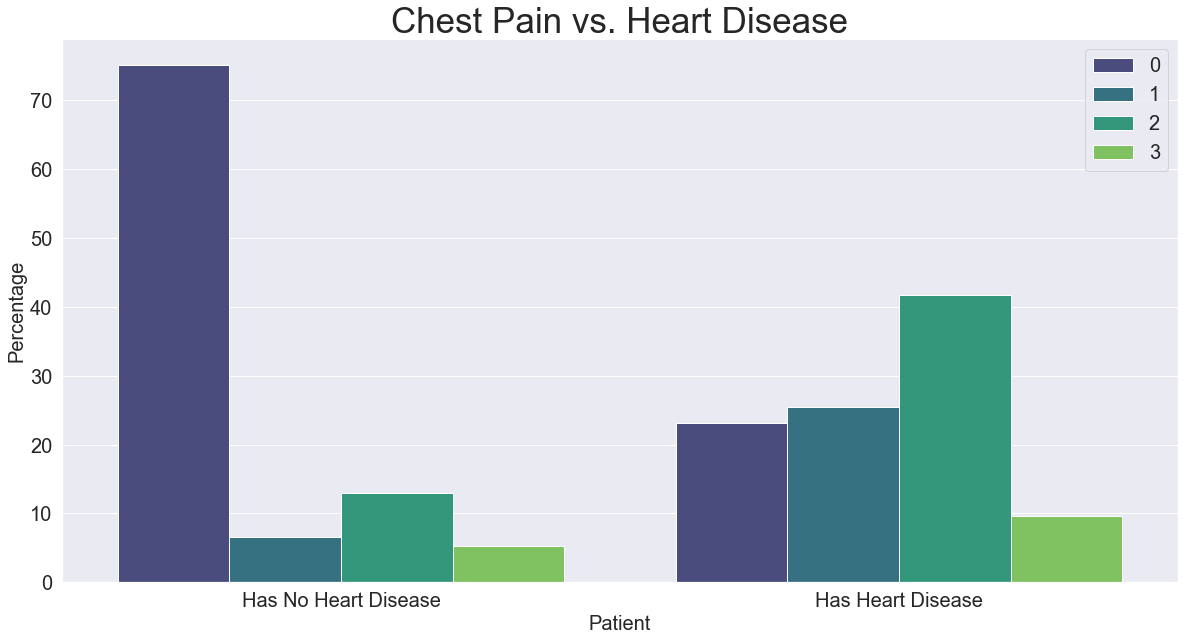

In [85]:
fig=plt.figure(figsize=(20,10))
temp = (heart_data.groupby(['Patient']))['Chest_Pain'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "Patient", y = "percentage", hue = "Chest_Pain", data = temp, palette ="viridis")
locs, labels=plt.xticks()
plt.legend(prop={'size': 20})
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Percentage",fontsize=20)
plt.xlabel("Patient",fontsize=20)
plt.title("Chest Pain vs. Heart Disease",fontsize=35)
new_xticks = ['Has No Heart Disease','Has Heart Disease']
plt.xticks(locs, new_xticks)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

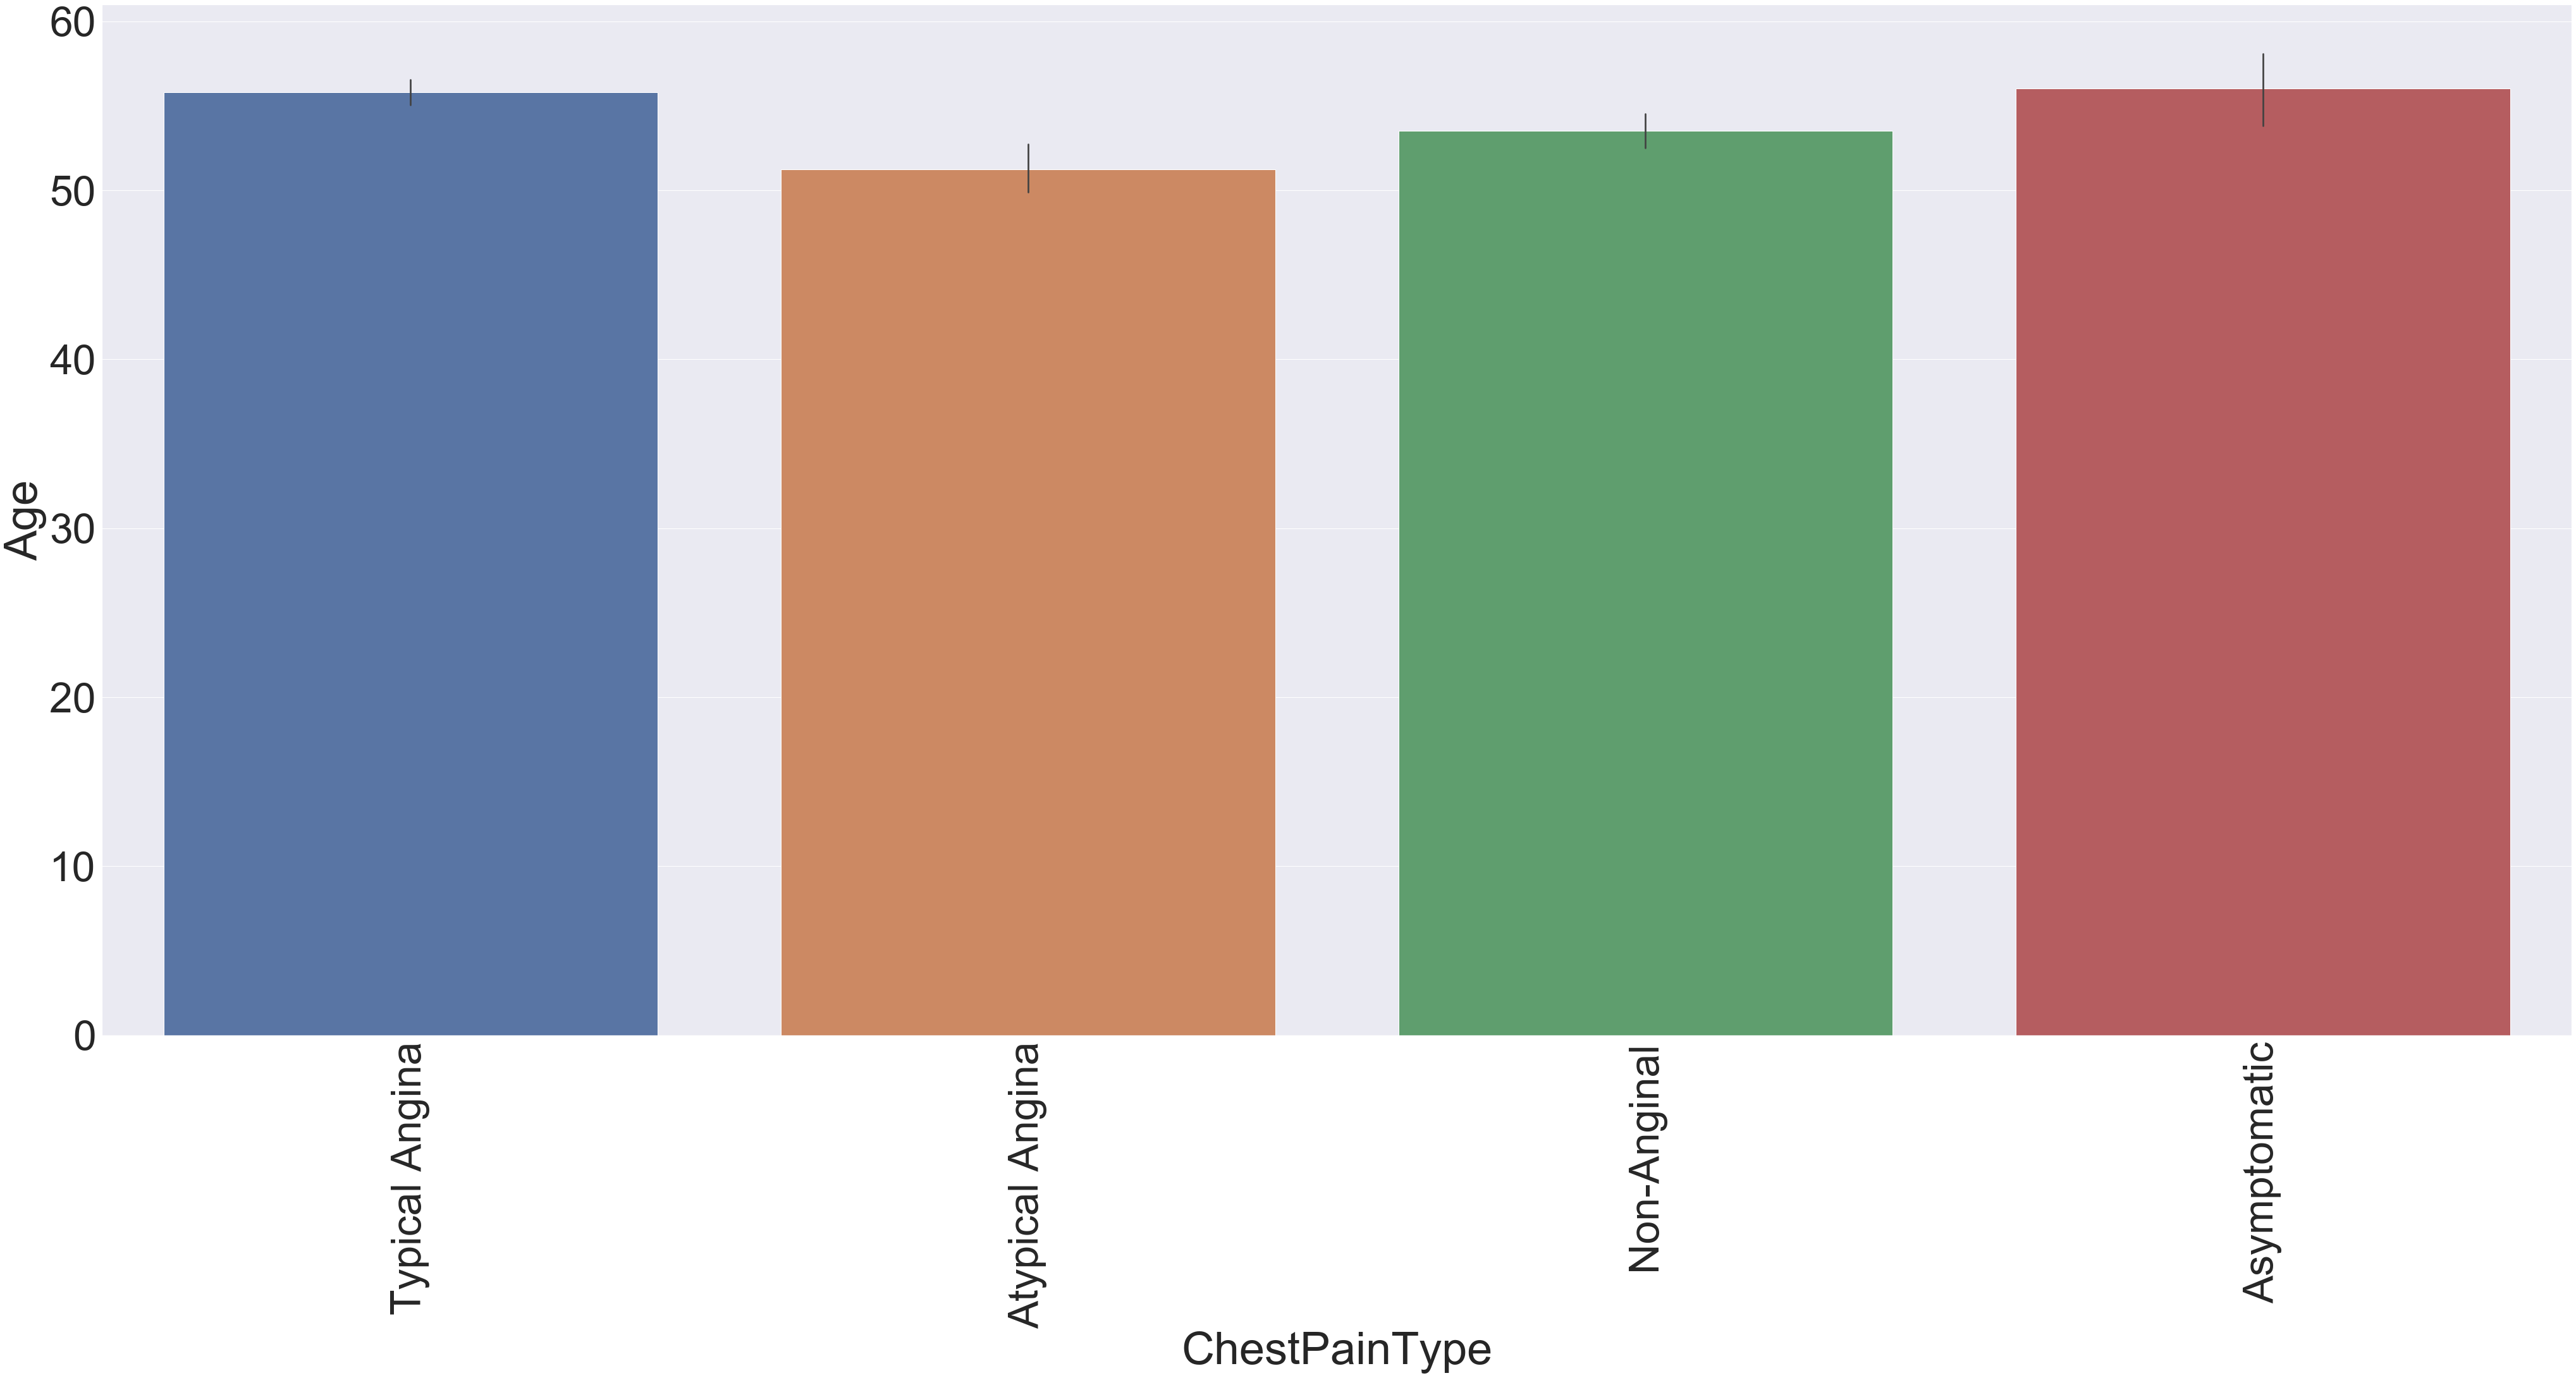

In [86]:
plt.figure(figsize=(70,30))
sns.set(font_scale=6)
sns.barplot(x='ChestPainType', y='Age', data = heart_data)
#plt.title('Cyber Crimes - Total')
plt.ylabel('Age')
plt.xticks(rotation=90)

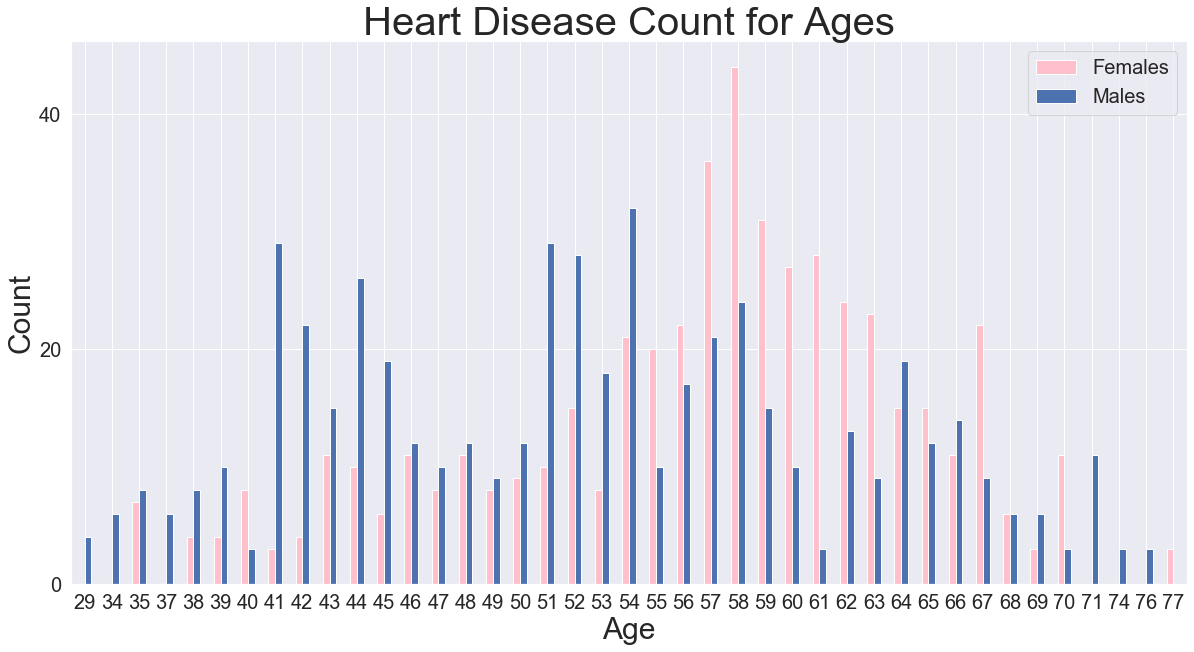

In [87]:
pd.crosstab(heart_data.Age,heart_data.Patient).plot(kind="bar",figsize=(20,10), color=['pink', 'b'])
plt.legend(['Females', 'Males'],prop={'size': 20})

plt.title('Heart Disease Count for Ages', fontsize =40)
plt.xlabel('Age', fontsize =30)
plt.ylabel('Count', fontsize =30)
plt.xticks(fontsize =20, rotation = 360)
plt.yticks(fontsize =20)

plt.show()

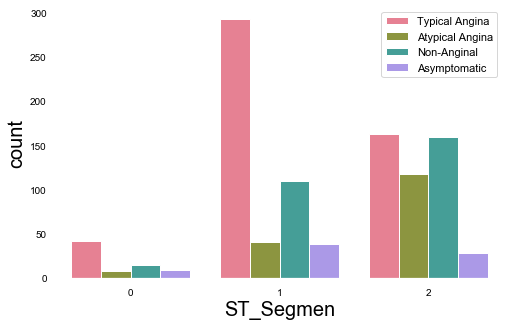

In [91]:
ax=sns.countplot(hue=result,x='ST_Segmen',data=heart_data,palette='husl')

[<matplotlib.patches.Rectangle object at 0x00000246EBDFA080>, <matplotlib.patches.Rectangle object at 0x00000246EBDEDE48>, <matplotlib.patches.Rectangle object at 0x00000246EBDFA438>, <matplotlib.patches.Rectangle object at 0x00000246EBDEDD68>, <matplotlib.patches.Rectangle object at 0x00000246EBDFA5F8>, <matplotlib.patches.Rectangle object at 0x00000246EBDEDF60>, <matplotlib.patches.Rectangle object at 0x00000246EBE06470>, <matplotlib.patches.Rectangle object at 0x00000246EBDEDF28>]


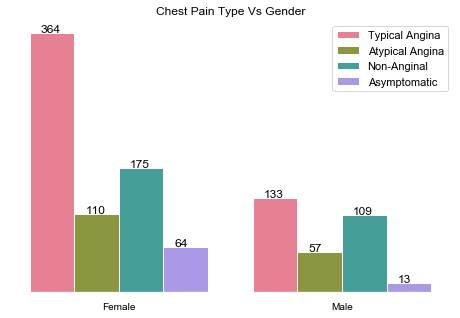

In [92]:
ax = sns.countplot(hue=result,x='Gender',data=heart_data,palette='husl')

plt.title("Chest Pain Type Vs Gender")    
plt.ylabel("")
plt.yticks([])
plt.xlabel("")
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.05, p.get_height()+1))
ax.set_xticklabels(['Female','Male'])
print(ax.patches)

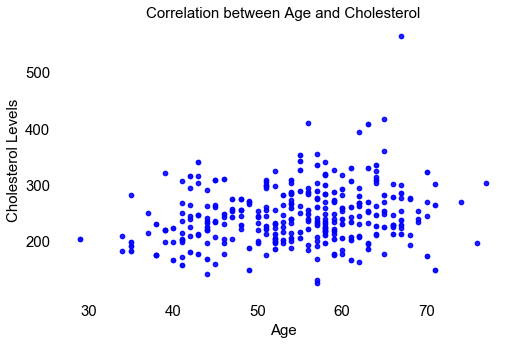

In [93]:

heart_data.plot(kind="scatter", x="Age", y="Cholesterol", alpha= 0.5, color="blue")
plt.xlabel("Age",fontsize=15)
plt.ylabel("Cholesterol Levels",fontsize = 15)
plt.title("Correlation between Age and Cholesterol", fontsize= 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.show()

([<matplotlib.axis.XTick at 0x246ebe3c2e8>,
 <a list of 2 Text xticklabel objects>)

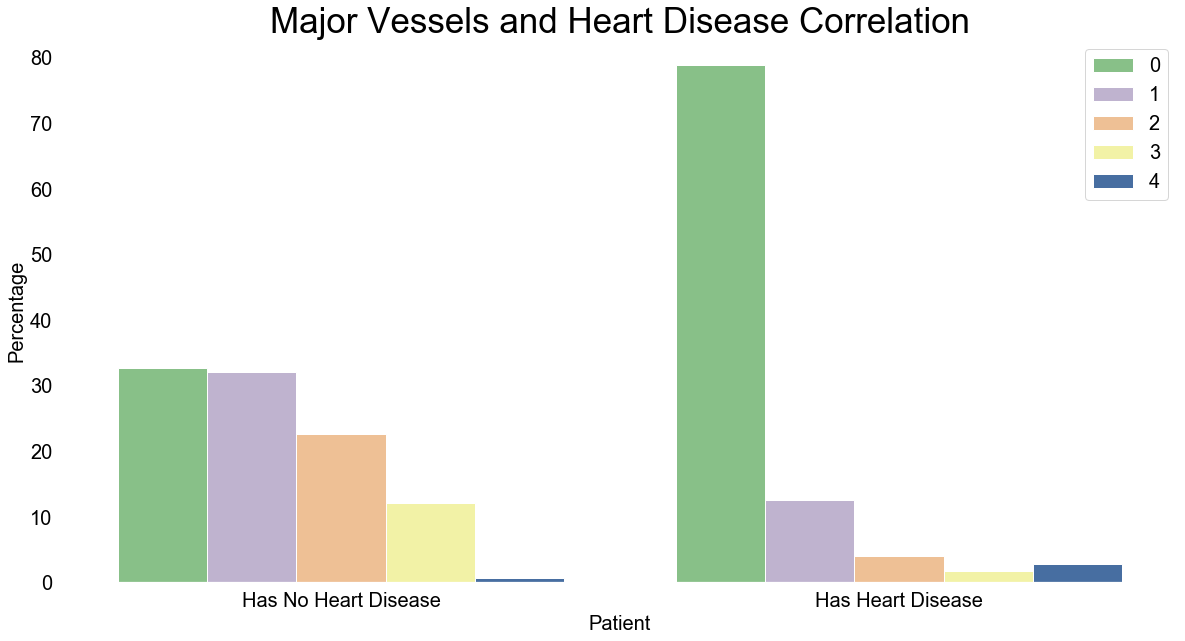

In [94]:
fig=plt.figure(figsize=(20,10))
temp = (heart_data.groupby(['Patient']))['Major_Vessels'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "Patient", y = "percentage", hue = "Major_Vessels", data = temp, palette="Accent")
plt.legend(prop={'size': 20})
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Percentage",fontsize=20)
plt.xlabel("Patient",fontsize=20)
plt.title("Major Vessels and Heart Disease Correlation",fontsize=35)
new_xticks = ['Has No Heart Disease','Has Heart Disease']
plt.xticks(locs, new_xticks)

People with Level-1 Pain : 497
People with Level-2 Pain : 284
People with Level-3 Pain : 167
People with Level-4 Pain : 77


Percentage with Level-1 Pain : 48.48780487804878 %
Percentage with Level-2 Pain : 16.29268292682927 %
Percentage with Level-3 Pain : 27.70731707317073 %
Percentage with Level-4 Pain : 7.512195121951219 %


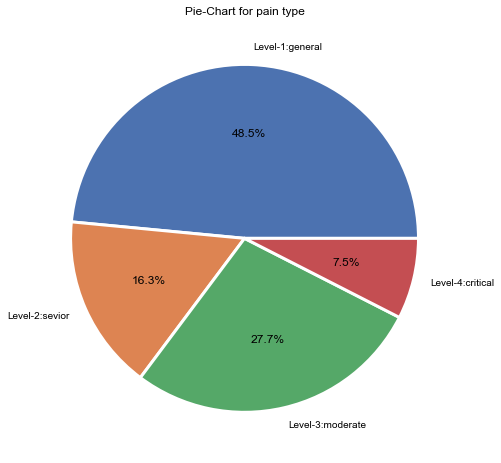

In [95]:
plt.figure(figsize=(8,8))
heart_data.Chest_Pain.replace(to_replace=[0,1,2,3],value=['general','sevior','moderate','critical'],inplace=True)
heart_data.Chest_Pain.unique()
general_ChestPain=[i for i in  heart_data.Chest_Pain if i=='general']
sevior_ChestPain=[i for i in  heart_data.Chest_Pain if i=='sevior']
moderate_ChestPain=[i for i in  heart_data.Chest_Pain if i=='moderate']
critical_ChestPain=[i for i in  heart_data.Chest_Pain if i=='critical']
print('People with Level-1 Pain :',len(general_ChestPain))
print('People with Level-2 Pain :',len(moderate_ChestPain))
print('People with Level-3 Pain :',len(sevior_ChestPain))
print('People with Level-4 Pain :',len(critical_ChestPain))

general_cpp=(len(general_ChestPain)*100)/len(heart_data.Chest_Pain)
sevior_cpp=(len(sevior_ChestPain)*100)/len(heart_data.Chest_Pain)
moderate_cpp=(len(moderate_ChestPain)*100)/len(heart_data.Chest_Pain)
critical_cpp=(len(critical_ChestPain)*100)/len(heart_data.Chest_Pain)
print('\n')
print('Percentage with Level-1 Pain :',str(general_cpp)+' %')
print('Percentage with Level-2 Pain :',str(sevior_cpp)+' %')
print('Percentage with Level-3 Pain :',str(moderate_cpp)+' %')
print('Percentage with Level-4 Pain :',str(critical_cpp)+' %')

labels=['Level-1:general','Level-2:sevior','Level-3:moderate','Level-4:critical']
values=[general_cpp,sevior_cpp,moderate_cpp,critical_cpp]
plt.pie(values,labels=labels,wedgeprops={'linewidth':3},autopct='%1.1f%%')

plt.title('Pie-Chart for pain type')
plt.show()

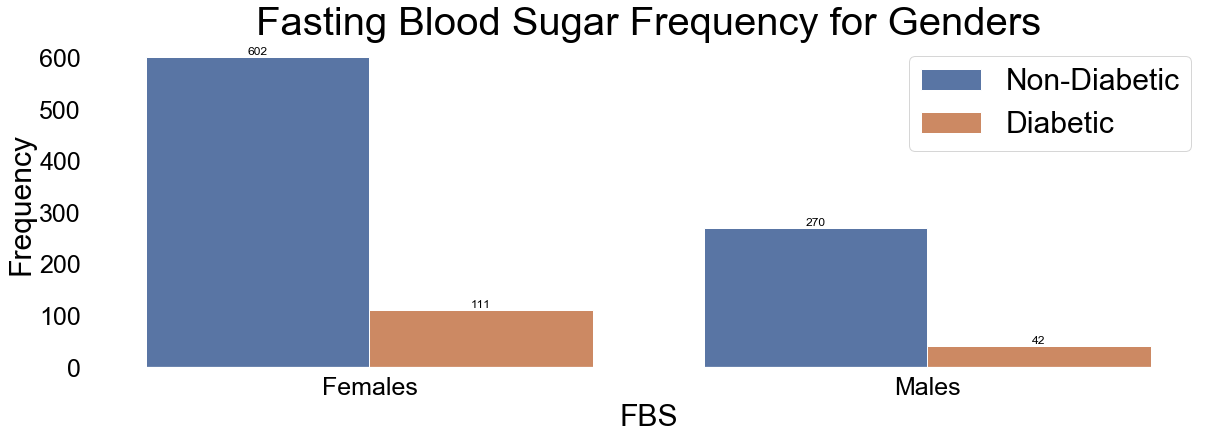

In [96]:
plt.figure(figsize=(20,6))

fasting_graph = sns.countplot(x='Gender', hue='Fasting_BS', data=heart_data)
plt.legend(['Non-Diabetic', 'Diabetic'],prop={'size': 30})

plt.title('Fasting Blood Sugar Frequency for Genders', fontsize =40)

plt.xlabel("FBS",fontsize=30)
plt.ylabel("Frequency",fontsize=30)

for p in fasting_graph.patches: 
    fasting_graph.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points') 

locs, labels=plt.xticks()
new_xticks = ['Females','Males']
plt.xticks(locs, new_xticks)
plt.xticks( fontsize=25)
plt.yticks(fontsize=25)
plt.show()

list of age group with critical chest pain : [51, 58, 56, 59, 52, 60, 61, 34, 40, 64, 69, 42, 38, 63, 45, 65, 66]


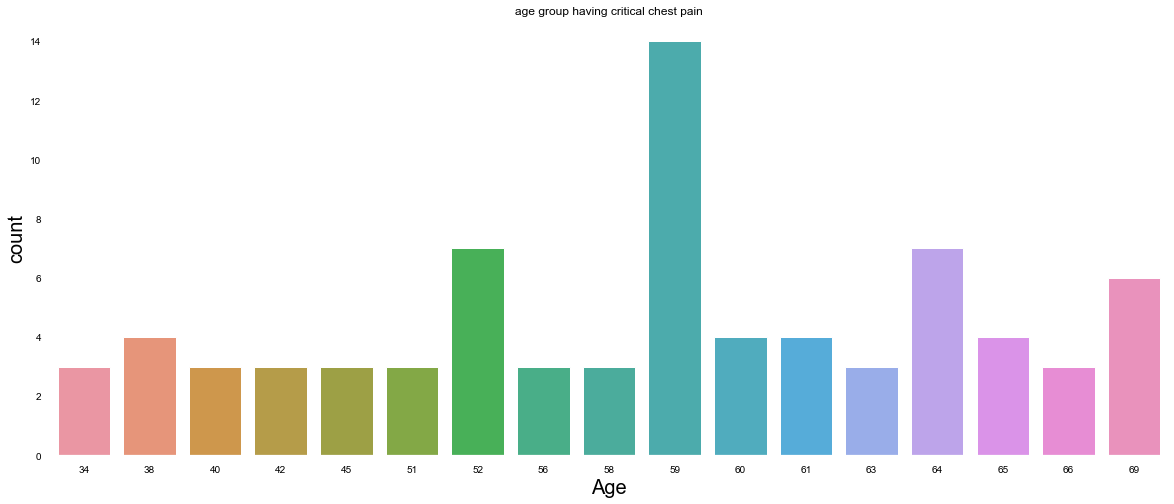

In [97]:
plt.figure(figsize=(20,8))
age_critical_ChestPain=[]
index_critical_ChestPain=[]  # index no. of people with critical chest pain
for i in range(len(heart_data)-1):
    if heart_data.Chest_Pain[i]=='critical':
             index_critical_ChestPain.append(i)
             age_critical_ChestPain.append(heart_data.Age[i])
sb.countplot(age_critical_ChestPain)
plt.xlabel('Age')
plt.title('age group having critical chest pain')
print('list of age group with critical chest pain :',list(Counter(age_critical_ChestPain)))


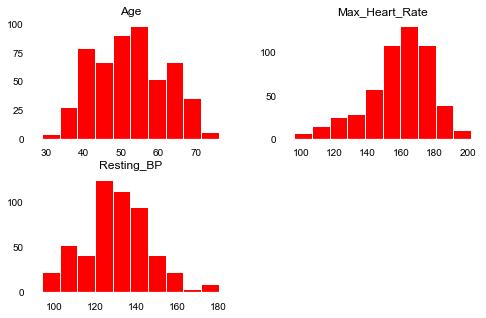

In [98]:
gf = heart_data[featuress+["Patient"]]
gf = gf[gf["Patient"]==1]
gf = gf[featuress]
gf.hist(color="red");

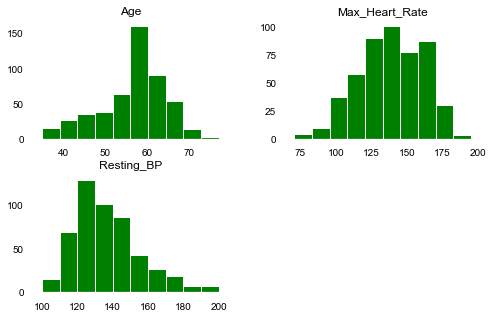

In [99]:
gf = heart_data[featuress+["Patient"]]
gf = gf[gf["Patient"]==0]
gf = gf[featuress]
gf.hist(color="green");

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text yticklabel objects>)

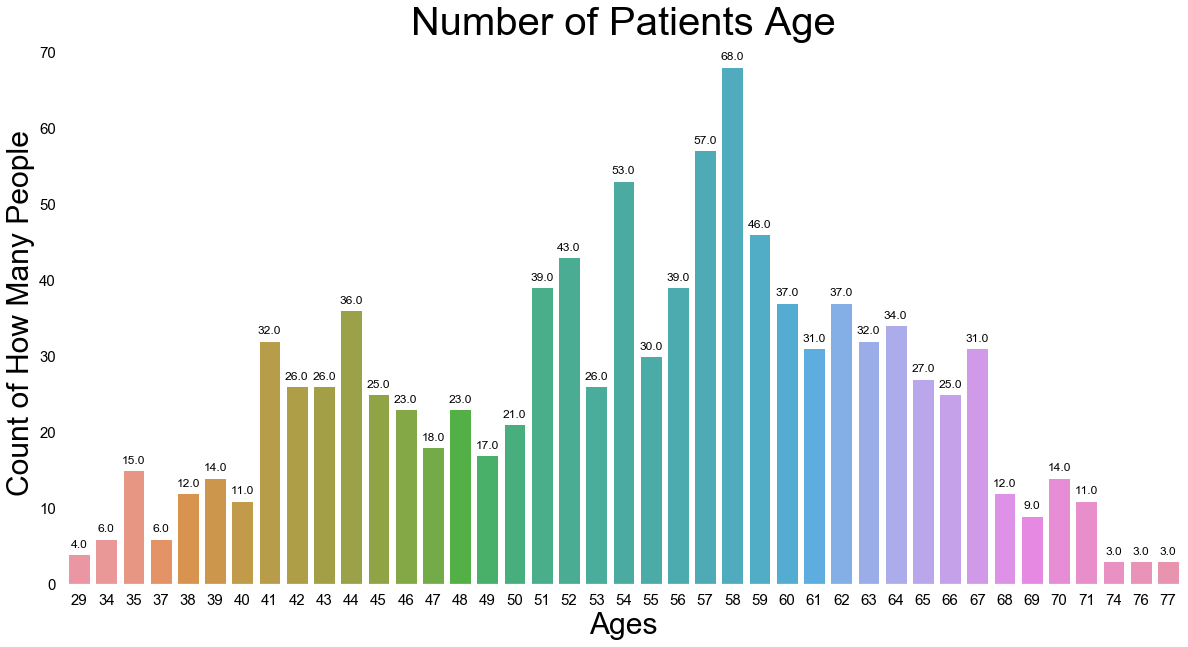

In [100]:
points_counts = heart_data['Age'].value_counts()
plt.figure(figsize=(20,10))
g=sns.barplot(x = points_counts.index, y = points_counts)
plt.title("Number of Patients Age", fontsize = 40)
plt.ylabel("Count of How Many People", fontsize = 30)


for p in g.patches: 
    g.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points') 

    
    plt.xlabel("Ages", fontsize = 30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

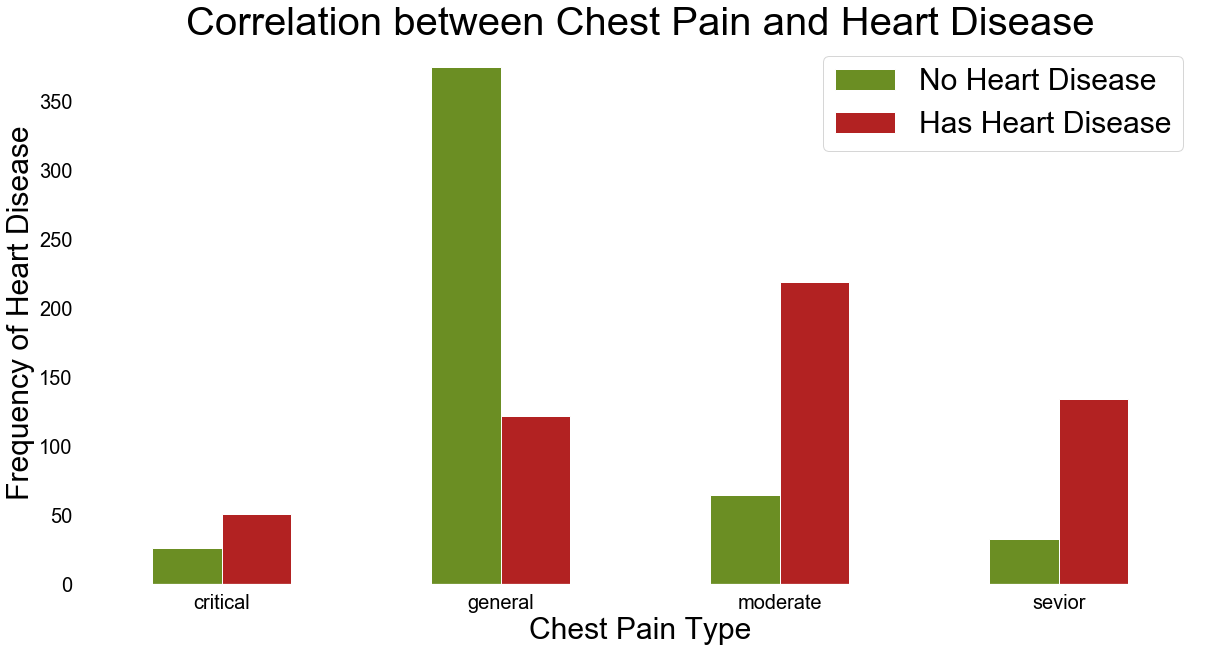

In [101]:
rap = pd.crosstab(heart_data.Chest_Pain,heart_data.Patient).plot(kind="bar",figsize=(20,10),color=['olivedrab','firebrick' ] )
plt.legend(['No Heart Disease', 'Has Heart Disease'],prop={'size': 30})

plt.xlabel('Chest Pain Type',fontsize=30)
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Heart Disease',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title("Correlation between Chest Pain and Heart Disease",fontsize =40)

for p in grap.patches: 
    grap.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points') 


plt.show()

([<matplotlib.axis.XTick at 0x246e7ee5668>,
 <a list of 2 Text xticklabel objects>)

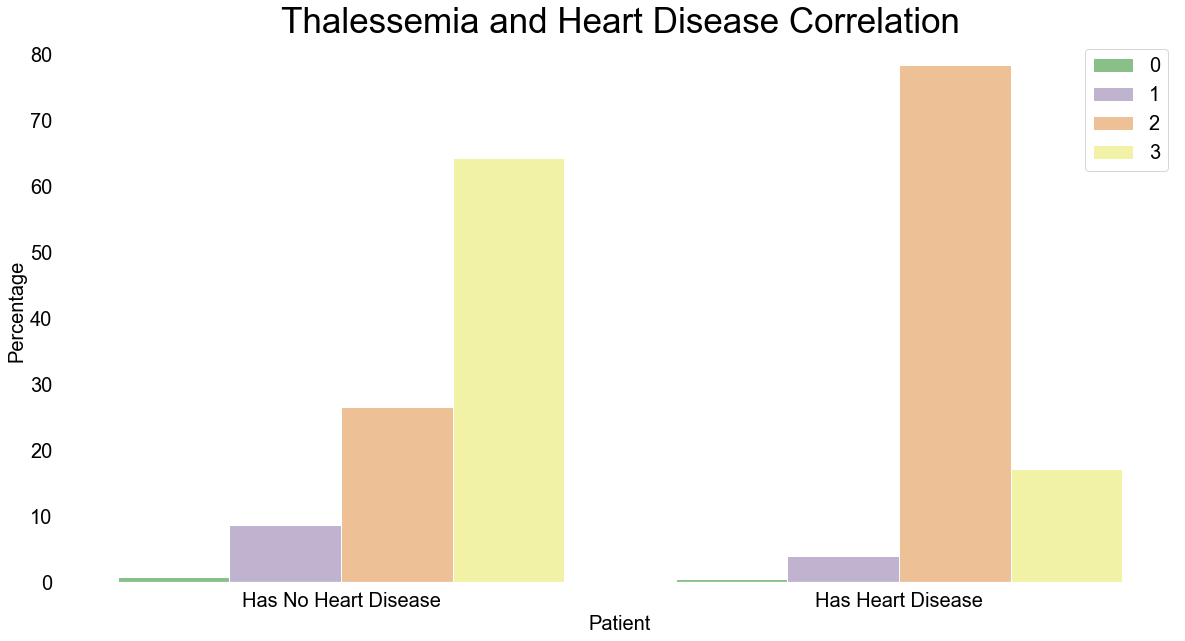

In [102]:
fig=plt.figure(figsize=(20,10))
temp = (heart_data.groupby(['Patient']))['Thalassemia'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "Patient", y = "percentage", hue = "Thalassemia", data = temp, palette="Accent")
plt.legend(prop={'size': 20})
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Percentage",fontsize=20)
plt.xlabel("Patient",fontsize=20)
plt.title("Thalessemia and Heart Disease Correlation",fontsize=35)
new_xticks = ['Has No Heart Disease','Has Heart Disease']
plt.xticks(locs, new_xticks)

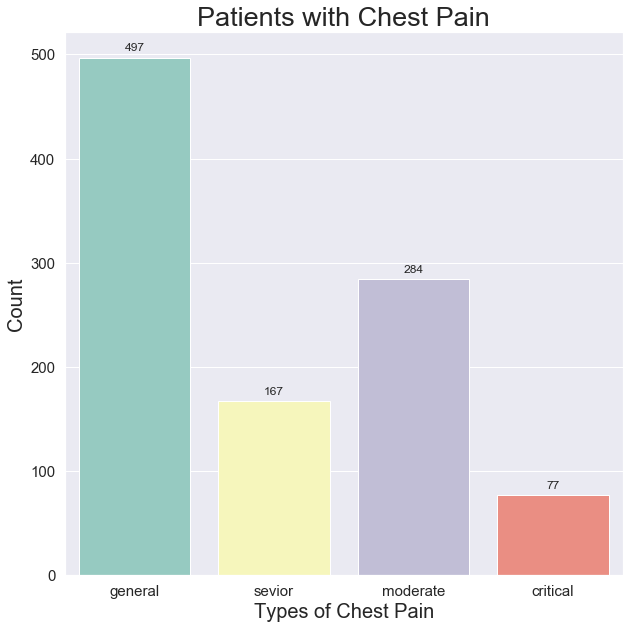

In [103]:
sns.set(style="darkgrid") 
plt.figure(figsize=(10, 10)) 
graph= sns.countplot(heart_data['Chest_Pain'], palette="Set3") 
plt.xlabel("Types of Chest Pain", fontsize=20) 
plt.ylabel("Count",fontsize=20) 
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 
plt.title("Patients with Chest Pain",fontsize =27) 

for p in graph.patches: 
    graph.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points') 
plt.show()